# Theory — Decision Tree Regression (CART)

What it solves
- Predict numeric targets by recursively partitioning feature space and using mean values in leaves.

Core concepts
- Split a node at feature/threshold that maximizes variance reduction (MSE decrease).
- Stop with max_depth, min_samples_split/leaf, or no improvement.
- Prediction: average of training targets in the leaf.

Pros, cons, pitfalls
- Pros: Non-linear, interpretable, handles mixed data and interactions.
- Cons: High variance (overfits) without constraints; piecewise constant steps.
- Pitfalls: Too-deep trees; small leaves; unscaled features are fine.

How this notebook implements it
- Dataset: Position_Salaries.csv
- Steps: DecisionTreeRegressor(max_depth, min_samples_leaf) → plot step-like prediction vs scatter.

Quick checklist
- Limit depth/leaf sizes.
- Validate via CV; check residual patterns.
- Consider ensembles (Random Forest, GBM) for smoother fits.


# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## Predicting a new result

In [4]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

C:\Users\MSI\AppData\Local\Temp\ipykernel_25748\1634290011.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


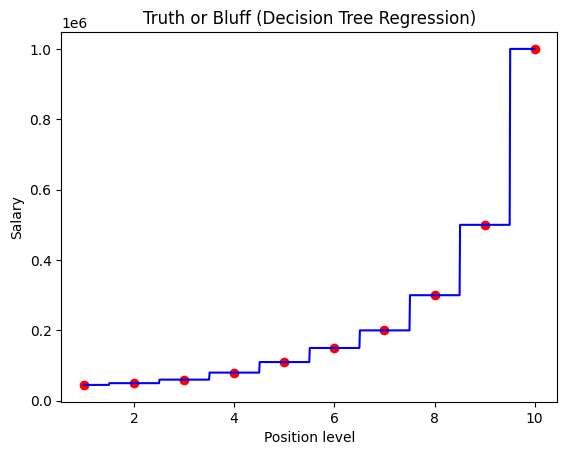

In [5]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()